In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
import torch
torch.cuda.set_device(1)

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz')

In [7]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100, embedding_dim=2)

05/29/2020 21:50:16 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/29/2020 21:50:18 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/29/2020 21:50:20 Loading Nifti image /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Final/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /media/babak/74e696ad-c235-46fc-a6e7-1830e44c8a1b/zulqarnain/Sound_Depression_Fin

In [8]:
dtfa.num_blocks

618

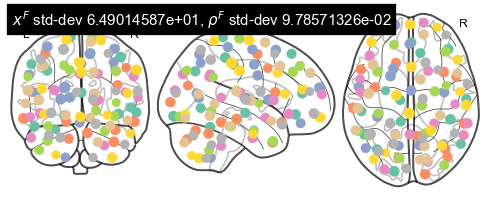

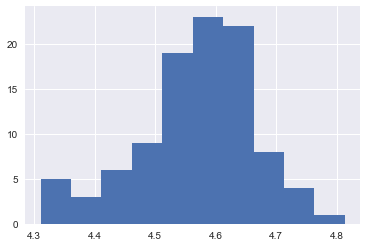

(<nilearn.plotting.displays.OrthoProjector at 0x7fb25c16d908>,
 tensor([[-2.5681e+01, -6.3539e+00, -2.5250e+01],
         [-1.0278e+01, -1.6298e+01,  8.5848e+00],
         [ 5.3484e+01, -6.2389e+01, -2.0991e+00],
         [ 4.0236e+01,  3.7401e+01, -8.7874e+00],
         [-1.6571e+01, -9.1060e+01, -1.0469e+01],
         [ 1.0893e+01,  3.3204e+01,  5.5026e+01],
         [-9.7143e+00, -3.8884e+01,  7.2280e+01],
         [-4.8092e+01, -5.2436e+01, -2.2017e+01],
         [ 1.3684e+00,  4.4501e+01,  1.3450e+01],
         [ 4.2564e+01, -3.6471e+01,  5.1037e+01],
         [ 5.9233e+01, -1.5372e+01, -7.0769e+00],
         [-5.1226e+01, -2.7832e+01,  4.3638e+01],
         [-3.4674e+01, -6.8138e+01,  3.6691e+01],
         [-5.1595e+01,  1.5913e+01,  1.4586e+01],
         [ 3.9365e+01, -7.5858e+01,  2.1641e+01],
         [-1.2080e+01, -7.6799e+01, -3.4898e+01],
         [ 5.7183e+01, -4.0937e+01, -1.6868e+01],
         [-3.6704e+01, -2.8176e+00,  5.4767e+01],
         [-5.9641e+01, -2.4526e+01, -

In [9]:
dtfa.visualize_factor_embedding()

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 5e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=True, blocks_filter=lepping_db.inference_filter(training=True, held_out_tasks=set(['tones', 'response'])))

05/29/2020 21:56:47 [Epoch 1] (13009ms) Posterior free-energy 1.72858040e+10 = KL from prior 1.06016880e+07 - log-likelihood -1.72752015e+10
05/29/2020 21:56:47 Saving checkpoint...
05/29/2020 21:57:00 [Epoch 2] (12863ms) Posterior free-energy 1.69802455e+10 = KL from prior 3.12567600e+06 - log-likelihood -1.69771172e+10
05/29/2020 21:57:13 [Epoch 3] (12512ms) Posterior free-energy 1.67243991e+10 = KL from prior 1.13154488e+06 - log-likelihood -1.67232676e+10
05/29/2020 21:57:25 [Epoch 4] (12518ms) Posterior free-energy 1.65089106e+10 = KL from prior 6.56768625e+05 - log-likelihood -1.65082522e+10
05/29/2020 21:57:38 [Epoch 5] (12376ms) Posterior free-energy 1.63215032e+10 = KL from prior 5.40074688e+05 - log-likelihood -1.63209636e+10
05/29/2020 21:57:50 [Epoch 6] (12370ms) Posterior free-energy 1.61721180e+10 = KL from prior 4.99200312e+05 - log-likelihood -1.61716193e+10
05/29/2020 21:58:02 [Epoch 7] (12338ms) Posterior free-energy 1.60265667e+10 = KL from prior 4.76139719e+05 - log

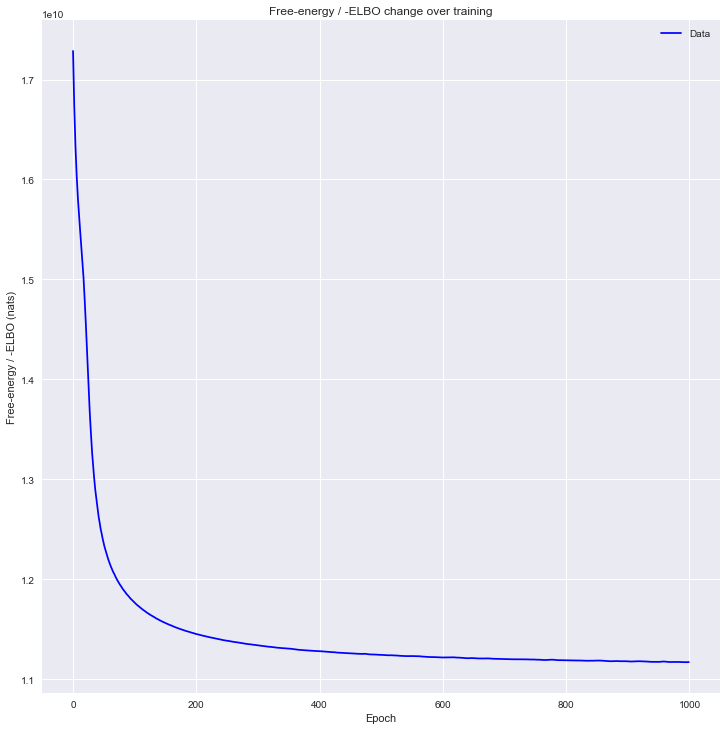

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=False, blocks_filter=lepping_db.inference_filter(training=False, held_out_tasks=set(['tones', 'response'])))

05/30/2020 01:26:33 [Epoch 1] (4178ms) Posterior free-energy 7.93764813e+09 = KL from prior 2.83233156e+05 - log-likelihood -7.93736499e+09
05/30/2020 01:26:33 Saving checkpoint...
05/30/2020 01:26:37 [Epoch 2] (4140ms) Posterior free-energy 7.79260774e+09 = KL from prior 2.82795094e+05 - log-likelihood -7.79232410e+09
05/30/2020 01:26:41 [Epoch 3] (4141ms) Posterior free-energy 7.71530854e+09 = KL from prior 2.82811781e+05 - log-likelihood -7.71502541e+09
05/30/2020 01:26:45 [Epoch 4] (4148ms) Posterior free-energy 7.51114240e+09 = KL from prior 2.82542719e+05 - log-likelihood -7.51086029e+09
05/30/2020 01:26:49 [Epoch 5] (4139ms) Posterior free-energy 7.41523763e+09 = KL from prior 2.81577906e+05 - log-likelihood -7.41495603e+09
05/30/2020 01:26:53 [Epoch 6] (4139ms) Posterior free-energy 7.26946918e+09 = KL from prior 2.82051844e+05 - log-likelihood -7.26918707e+09
05/30/2020 01:26:57 [Epoch 7] (4141ms) Posterior free-energy 7.12288666e+09 = KL from prior 2.81202500e+05 - log-likeli

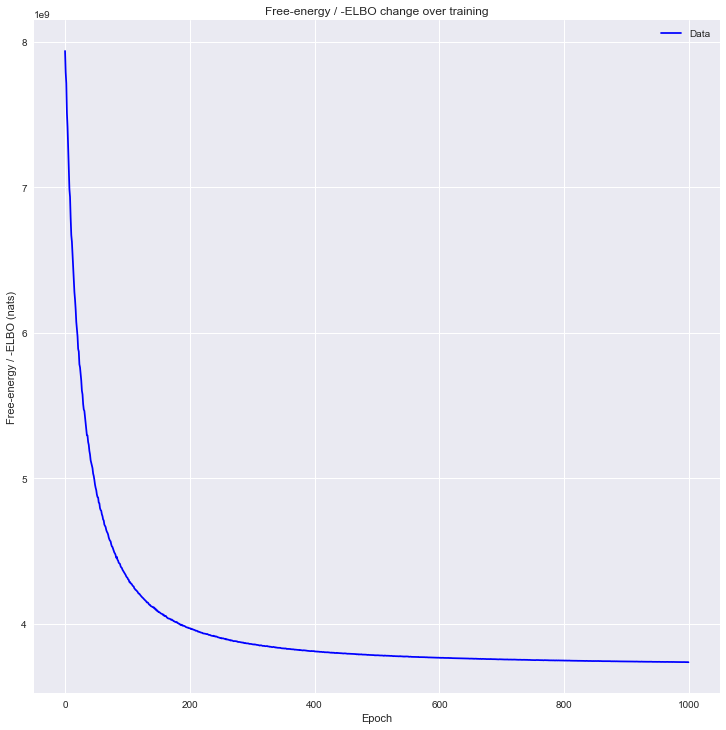

In [13]:
utils.plot_losses(losses)

In [14]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [15]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    elif task == 'negative_nonmusic':
        task = 'Negative sounds'
    elif task == 'positive_nonmusic':
        task = 'Positive sounds'
    else:
        task = task.capitalize()
    return task

In [16]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.subject)
    return subject + ', ' + task + ' stimulus'

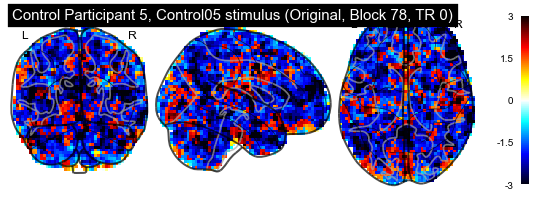

05/30/2020 02:35:43 Reconstruction Error (Frobenius Norm): 1.45171997e+02 out of 7.94023926e+02


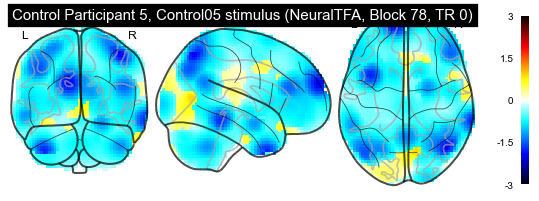

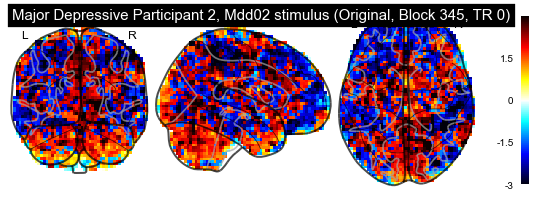

05/30/2020 02:35:47 Reconstruction Error (Frobenius Norm): 1.42302734e+02 out of 8.24331543e+02


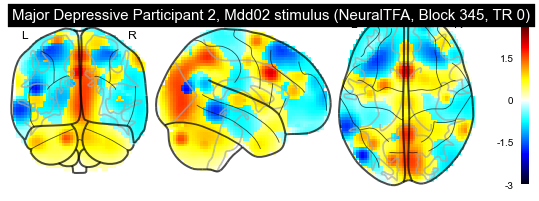

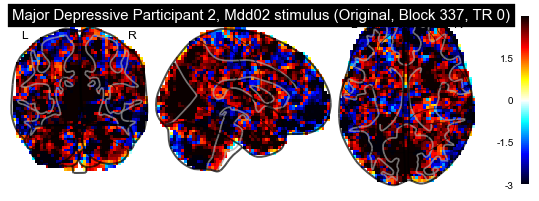

05/30/2020 02:35:52 Reconstruction Error (Frobenius Norm): 1.81854614e+02 out of 8.88290466e+02


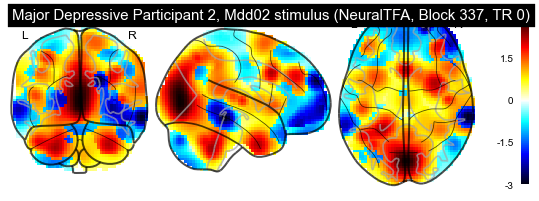

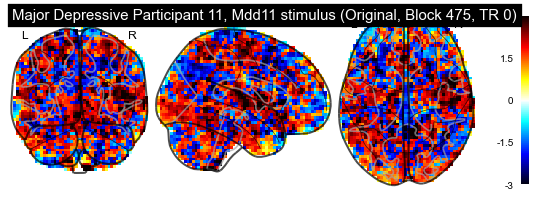

05/30/2020 02:35:57 Reconstruction Error (Frobenius Norm): 1.23636070e+02 out of 7.74468994e+02


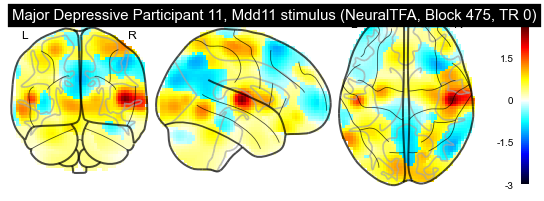

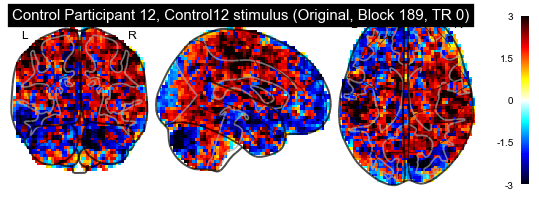

05/30/2020 02:36:01 Reconstruction Error (Frobenius Norm): 1.95078995e+02 out of 8.88191406e+02


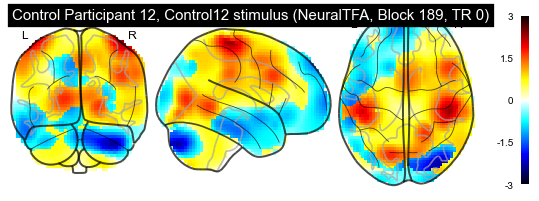

In [17]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

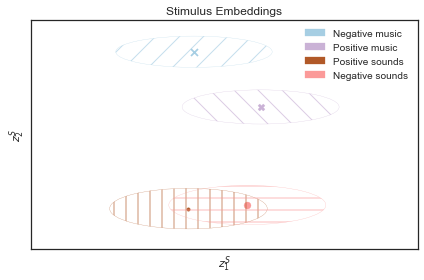

In [18]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Paired', legend_ordering=[0, 2, 3, 1])

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


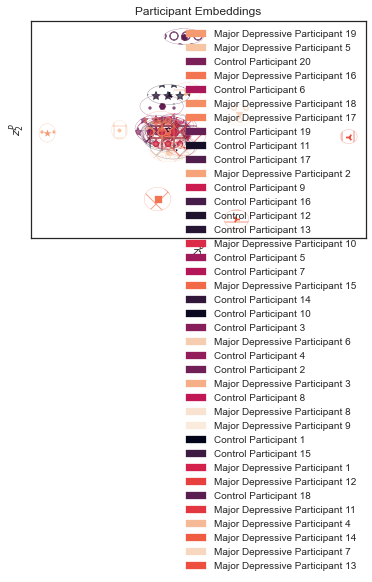

In [19]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

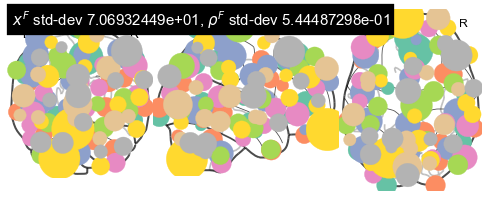

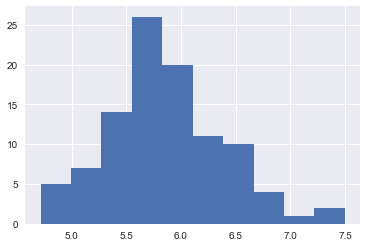

(<nilearn.plotting.displays.OrthoProjector at 0x7fb200da6b70>,
 tensor([[ -23.3145,   -3.9094,  -26.8523],
         [  -1.7861,  -16.5576,    7.8998],
         [  56.0497,  -60.4120,    5.8153],
         [  39.9822,   32.1742,  -11.0919],
         [ -24.5431, -105.9000,  -11.1001],
         [   5.9874,   35.3088,   50.2343],
         [  -1.4922,  -65.0065,   84.0000],
         [ -39.5646,  -61.9771,  -19.9615],
         [  -3.2112,   48.7657,    2.3852],
         [  57.3849,  -45.0317,   48.4626],
         [  57.5114,  -11.3692,  -15.2719],
         [ -60.3493,  -28.2745,   29.1312],
         [ -54.0064,  -68.6707,   44.4641],
         [ -52.0297,   23.7205,   21.6780],
         [  30.3529,  -80.9426,   23.8050],
         [ -16.8371,  -86.2491,  -31.5275],
         [  68.0910,  -45.9637,   -2.2411],
         [ -46.8600,    1.3842,   49.1803],
         [ -66.6008,  -37.9486,   -6.7219],
         [  45.6819,   10.8094,   28.5472],
         [  35.9370,   11.8976,  -46.2040],
         [  3

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error()

05/30/2020 02:36:42 Average reconstruction error (MSE): 8.90659534e-01
05/30/2020 02:36:42 Average data norm (Euclidean): 1.05002988e+00
05/30/2020 02:36:42 Percent average reconstruction error: 0.342532


(0.8906595337005104, 1.0500298764706433, 0.0034253243165617946)

In [22]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

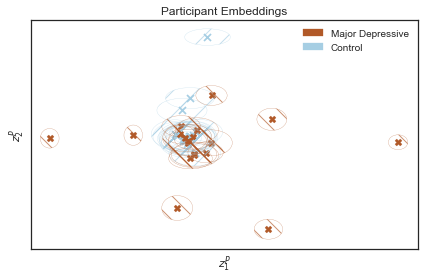

In [23]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None, colormap='Paired')

In [24]:
dtfa.average_reconstruction_error(weighted=False)

05/30/2020 02:37:17 Average reconstruction error (MSE): 7.03840072e+02 +/- 4.74761747e+01
05/30/2020 02:37:17 Average data norm (Euclidean): 8.29830952e+02 +/- 5.52383571e+01
05/30/2020 02:37:17 Percent average reconstruction error: 84.940061 +/- 4.71491164e+00


(array([739.58544922, 716.26470947, 652.01025391, 732.52789307,
        681.81109619, 694.85913086, 725.95599365, 708.2678833 ,
        630.71813965, 627.92028809, 641.01794434, 634.02294922,
        670.847229  , 722.9956665 , 691.87744141, 680.99053955,
        659.7734375 , 689.03515625, 673.02966309, 687.6239624 ,
        734.63140869, 744.33032227, 753.24041748, 744.7088623 ,
        706.12701416, 720.93218994, 718.78936768, 702.13977051,
        685.39898682, 760.44317627, 712.39886475, 736.36962891,
        678.20495605, 689.79614258, 685.34136963, 677.8996582 ,
        636.11260986, 636.40283203, 642.18865967, 602.8737793 ,
        718.18048096, 658.3527832 , 707.82446289, 720.49035645,
        700.66473389, 715.5581665 , 710.05175781, 736.24938965,
        734.89532471, 729.05505371, 735.1817627 , 710.5178833 ,
        752.00018311, 759.46697998, 766.13909912, 776.56195068,
        748.76641846, 757.61804199, 755.81799316, 734.90582275,
        710.70782471, 744.86712646, 687.